### [개인정보 수집 유효기간](https://school.programmers.co.kr/learn/courses/30/lessons/150370)

- 이전에 풀었던 코드

In [ ]:
def solution(today, terms, privacies):
    terms = {x.split()[0]:x.split()[1] for x in terms}
    today = 12*int(today.split('.')[0]) + int(today.split('.')[1]) + int(today.split('.')[2]) / 28
    
    answer = []
    for i, privacy in enumerate(privacies):
        period, contract = privacy.split()
        period = 12*int(period.split('.')[0]) + int(period.split('.')[1]) + int(period.split('.')[2]) / 28
        
        duration = today - period
        if duration >= int(terms[contract]):
            answer.append(i+1)
        
    return answer

- 특별히 수정할 곳은 없으나, 논리가 좀 더 뚜렷하게 보이게 수정(성능은 떨어짐)

In [ ]:
def solution(today, terms, privacies):
    terms = {x.split()[0]:int(x.split()[1]) for x in terms}
    today = 12*int(today.split('.')[0]) + int(today.split('.')[1]) + int(today.split('.')[2]) / 28
    
    privacies = [privacy.split() for privacy in privacies]
    privacies = {idx+1:[contract, list(map(int, privacy.split('.')))] for idx, (privacy, contract) in enumerate(privacies)}
    
    answer = []
    for idx, (contract, privacy) in privacies.items():
        period = 12*int(privacy[0]) \
                + int(privacy[1]) \
                + int(terms[contract]) \
                + int(privacy[2]) / 28 \
                - today
        if period <= 0: # 남은 기간이 없다면
            answer.append(idx)        
        
    return answer

### [공원 산책](https://school.programmers.co.kr/learn/courses/30/lessons/172928)

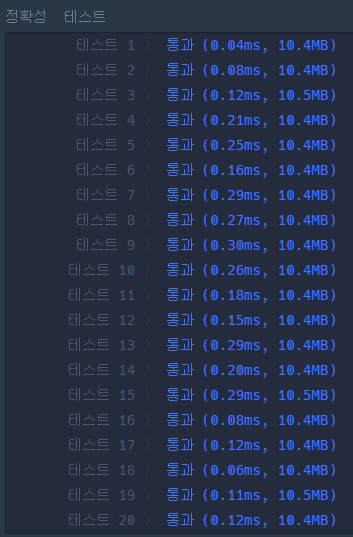

- 이전 코드

In [3]:
def solution(park, routes):    
    cur_x, cur_y = [(idx, x.index('S')) for idx, x in enumerate(park) if 'S' in x][0] # 현재 위치
    height, width = len(park), len(park[0])
    
    directions = {'E':(0,1), 'W':(0,-1), 'S':(1,0), 'N':(-1,0)}
    for route in routes:
        op, n = route.split()
        dx, dy = directions[op]
        nexts = [(cur_x+i*dx, cur_y+i*dy) for i in range(1, int(n)+1)]
        filtered = [x for x in nexts if 0 <= x[0] < height and 0 <= x[1] < width]
        if all(filtered != 'X'):
            cur_x, cur_y = nexts[-1][0], nexts[-1][1]
                
    return [cur_x, cur_y]

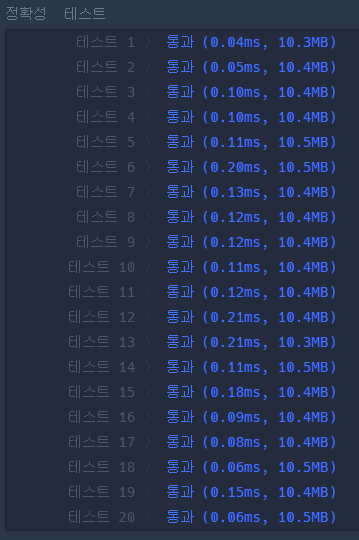

- 가독성을 조금 높이고, 조건문을 처리하는 과정을 간소화해 조금 더 최적화

In [6]:
def solution(park, routes):    
    cx, cy = [(idx, x.index('S')) for idx, x in enumerate(park) if 'S' in x][0] # 현재 위치
    height, width = len(park), len(park[0])
    
    directions = {'E':(0,1), 'W':(0,-1), 'S':(1,0), 'N':(-1,0)}
    for route in routes:
        op, n = route.split()
        dx, dy = directions[op]
        nexts = [(cx+i*dx, cy+i*dy) for i in range(1, int(n)+1)]
        last = nexts[-1]
        if 0 <= last[0] < height and 0 <= last[1] < width and not any([(x, y) for (x,y) in nexts if park[x][y] == 'X']):            
            (cx, cy) = last
                
    return [cx, cy]

True

### [신고 결과 받기](https://school.programmers.co.kr/learn/courses/30/lessons/92334)

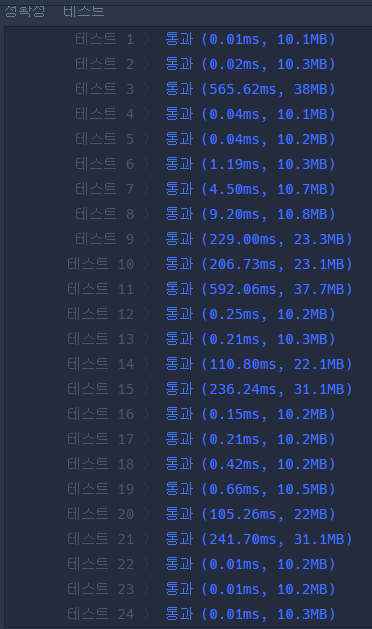

- 이전 코드

In [ ]:
def solution(id_list, report, k):
    report_list = {x:[0, []] for x in id_list} # user name : cnt, [user를 신고한 사람들]
    for r in report :
        a, b = r.split() # 신고한 사람, 신고당한 사람
        if a not in report_list[b][1]:
            report_list[b][0] += 1
            report_list[b][1].append(a)
    
    answer = {x:0 for x in id_list}
    for ids in id_list:
        if report_list[ids][0] >= k:
            report_names = report_list[ids][1]
            for name in report_names:
                answer[name] += 1

    return list(answer.values())

- default dict와 set 등을 활용해 코드를 간소화하고, 이를 통해 성능 개선

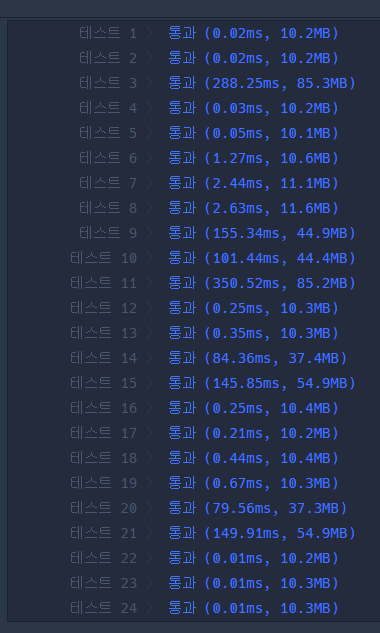

In [ ]:
from collections import defaultdict

def solution(id_list, report, k):
    report = [x.split() for x in set(report)]   
    result = defaultdict(list)
    for a, b in report:
        result[b].append(a)
        
    answer = {name:0 for name in id_list}
    for name, reporters in result.items():
        if len(reporters) >= k:
            for reporter in reporters:
                answer[reporter] += 1
    return list(answer.values())

### [가장 많이 받은 선물](https://school.programmers.co.kr/learn/courses/30/lessons/258712)

- 기존 코드  
성능은 준수하나, 코드 가독성이 떨어짐

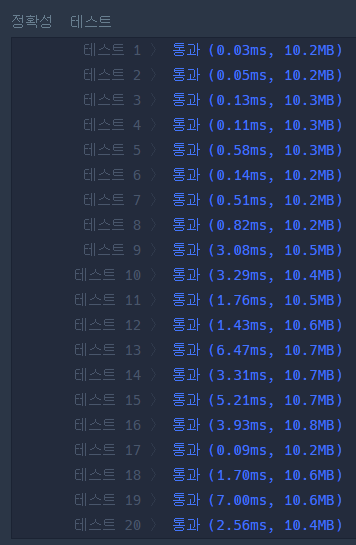

In [ ]:
def solution(friends, gifts):
    friend_keys = {}
    for idx, friend in enumerate(friends):
        friend_keys[friend] = idx
    
    n = len(friends)
    fromto = [[0] * n for _ in range(n)]
    for gift in gifts :
        from_f, to_f = gift.split()
        fromto[friend_keys[from_f]][friend_keys[to_f]] += 1
        
    nextMonth = [0] * n
    plus_factors = [sum(column) for column in fromto]
    minus_factors = [sum(column) for column in zip(*fromto)]
    scores = [x-y for x, y in zip(plus_factors, minus_factors)]
    for i in range(n):
        for j in range(n):            
            if i == j:
                continue
            if fromto[i][j] > fromto[j][i]:
                nextMonth[i] += 1
            elif fromto[i][j] < fromto[j][i]:
                nextMonth[j] += 1
            else :
                i_score = scores[i]
                j_score = scores[j]
                if i_score == j_score:
                    continue
                elif i_score > j_score:
                    nextMonth[i] += 1
                else :
                    nextMonth[j] += 1
    
    answer = max(nextMonth) // 2

    return answer

- 개선 1: 가독성을 높이기 위해 defaultdict 등을 이용해 코드 압축, But 성능이 다소 떨어짐

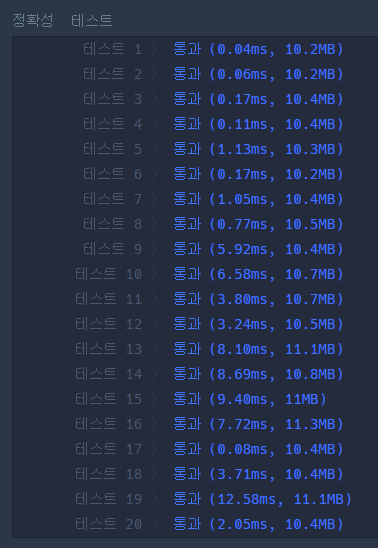

In [ ]:
from collections import defaultdict

def solution(friends, gifts):
    score = defaultdict(int)  # 선물 지수
    record = defaultdict(int) # 주고받은 선물 수
    for gift in gifts:
        f, t = gift.split()   # 준 사람, 받은 사람
        score[f] += 1
        score[t] -= 1
        record[(f, t)] += 1  # 튜플을 키로 사용
    
    answer = defaultdict(int)
    for idx, a in enumerate(friends):
        for b in friends[idx+1:]:
            a_to_b = record.get((a, b), 0)
            b_to_a = record.get((b, a), 0)
            
            if a_to_b > b_to_a:
                answer[a] += 1
            elif a_to_b < b_to_a:
                answer[b] += 1
            else:
                if score[a] > score[b]:
                    answer[a] += 1
                elif score[a] < score[b]:
                    answer[b] += 1
    
    if answer:
        return max(answer.values())
    else:
        return 0

- 개선 2: 기존 코드를 활용하되, 가독성 등을 고려해 압축

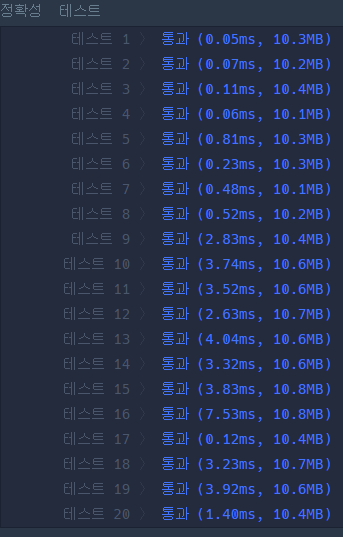

In [ ]:
def solution(friends, gifts):
    friend_to_index = {friend: idx for idx, friend in enumerate(friends)}
    n = len(friends)
    
    # record[i][j]: 친구 i가 친구 j에게 준 선물의 수
    record = [[0] * n for _ in range(n)]
    for gift in gifts:
        giver, receiver = gift.split()
        giver_idx = friend_to_index[giver]
        receiver_idx = friend_to_index[receiver]
        record[giver_idx][receiver_idx] += 1
    
    sent_counts = [sum(record[i]) for i in range(n)]  # 각 친구가 준 선물의 총 수
    received_counts = [sum(record[j][i] for j in range(n)) for i in range(n)]  # 각 친구가 받은 선물의 총 수
    scores = [sent - received for sent, received in zip(sent_counts, received_counts)]
    
    next_month = [0] * n
    for i in range(n):
        for j in range(i + 1, n):
            i_to_j = record[i][j]
            j_to_i = record[j][i]
            
            # 주고 받은 선물의 우위가 있는 경우
            if i_to_j > j_to_i:
                next_month[i] += 1
            elif j_to_i > i_to_j:
                next_month[j] += 1
            
            # 주고받은 선물 수가 같을 경우, 선물 지수로 판단
            else:                
                if scores[i] > scores[j]:
                    next_month[i] += 1
                elif scores[j] > scores[i]:
                    next_month[j] += 1
                else:
                    continue
    
    # 다음 달에 가장 많이 선물을 받는 횟수를 반환
    return max(next_month) if next_month else 0